In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
from pylab import rcParams
import matplotlib.colors as mcolors
from matplotlib import font_manager

In [3]:
# Import necessary fonts
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_manager.findfont("PP Neue Montreal")

'/Users/laurabarreda/Library/Fonts/PPNeueMontreal-Book.otf'

In [4]:
# Define styling
enmax_palette = ["#c5c5c5", "#f54939", "#2018c2", '#a1a1a1', '#838383']
color_codes_wanted = ['grey1', 'red', 'blue', 'grey2', 'grey3']
c = lambda x: enmax_palette[color_codes_wanted.index(x)]
color_pair = [c('red'), c('grey2')]
mpl.rcParams['font.sans-serif'] = 'PP Neue Montreal'
# plt.rc('legend',fontsize=20)
plt.rc('legend',edgecolor='white')
plt.rc('legend',facecolor=c('grey1'))
plt.rc('font', size=20) 

In [5]:
# Import european worker force dataset
europe_worker_force_total = pd.read_csv('../03_filtered_data/europe_worker_force_total.csv')

In [6]:
# Define the function to pring an individual pie plot
def pie_plot_general(data1, data2, labels_pie, title, colors):
    '''
    Funcion que crea un pieplot único
    '''
    fig, ax = plt.subplots(facecolor=c("grey1"), figsize=(16, 8))
    pie_plot = plt.pie([data1, data2], labels = None, colors = colors, autopct='%.0f%%', wedgeprops={"edgecolor":"white"}, textprops={'color':"w", 'fontsize':'15', 'fontweight' : 'semibold'})
    plt.legend(labels=labels_pie,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white')
    plt.title(title, pad=30, fontsize = 20)
    return pie_plot

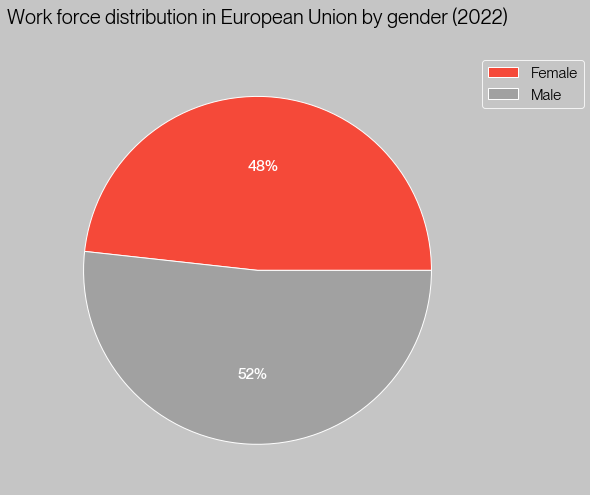

In [7]:
# Define the individual settings for the plot
labels = ['Female', 'Male']
title = 'Work force distribution in European Union by gender (2022)'
data1 = europe_worker_force_total['2022_females'][0]
data2 = europe_worker_force_total['2022_males'][0]

pie_plot_general(data1, data2, labels, title, color_pair);

In [8]:
# Get the data to print a bar plot
year = [2019,2020,2021,2022]
female = [europe_worker_force_total['2019_females'][0], europe_worker_force_total['2020_females'][0], europe_worker_force_total['2021_females'][0], europe_worker_force_total['2022_females'][0]]
male = [europe_worker_force_total['2019_males'][0], europe_worker_force_total['2020_males'][0], europe_worker_force_total['2021_males'][0], europe_worker_force_total['2022_males'][0]]

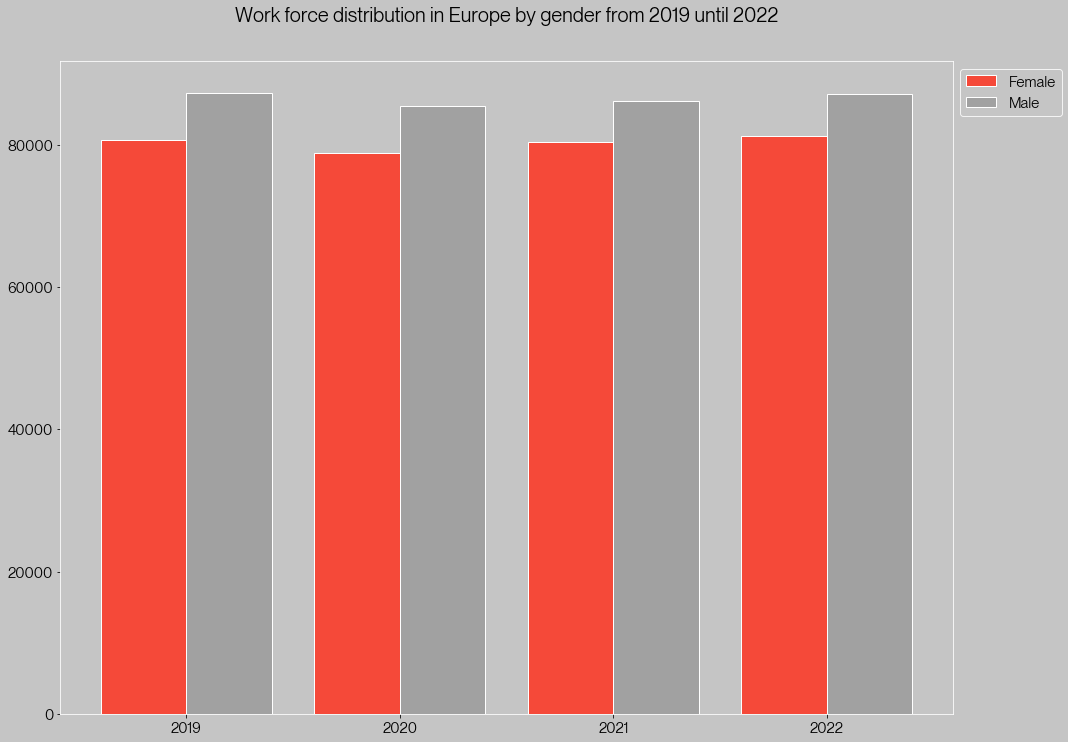

In [9]:
# Define the individual settings of the bar plot
x_axis = np.arange(len(year))
fig, ax = plt.subplots(facecolor=c("grey1"), figsize=(16, 12))
ax.set_facecolor(c("grey1"))
plt.bar(x_axis -0.2, female, width=0.4, label = 'Female', color=c('red'), edgecolor='white');
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male', color=c('grey2'), edgecolor='white');

plt.grid(visible=False)
plt.xticks(x_axis, year);
plt.title('Work force distribution in Europe by gender from 2019 until 2022', pad=40, fontsize = 20);
plt.legend(labels=['Female', 'Male'],loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

plt.setp(ax.get_xticklabels(), fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=15)

plt.show()

In [10]:
# Import european worker force datasets by profession title
europe_worker_force_total_managers = pd.read_csv('../03_filtered_data/europe_worker_force_managers.csv')
europe_worker_force_total_professionals = pd.read_csv('../03_filtered_data/europe_worker_force_professionals.csv')
europe_worker_force_total_technicians = pd.read_csv('../03_filtered_data/europe_worker_force_technicians.csv')
europe_worker_force_total_support = pd.read_csv('../03_filtered_data/europe_worker_clerical_support.csv')

In [11]:
# Define the function to create a pie plot in a grid of 4
def pie_plot_inside_grid4(data1, data2,ax1, ax2):
    '''
    Función que crea un pie plot preparado para estar dentro de un grid de 4x4
    '''
    data = [data1, data2]
    colors = [c('red'), c('grey2')]
    pie_plot_total = axs[ax1, ax2].pie(data, colors = colors, autopct='%.0f%%', wedgeprops={"edgecolor":"white"}, textprops={'color':"w", 'fontsize':'15', 'fontweight' : 'semibold'})

    return pie_plot_total

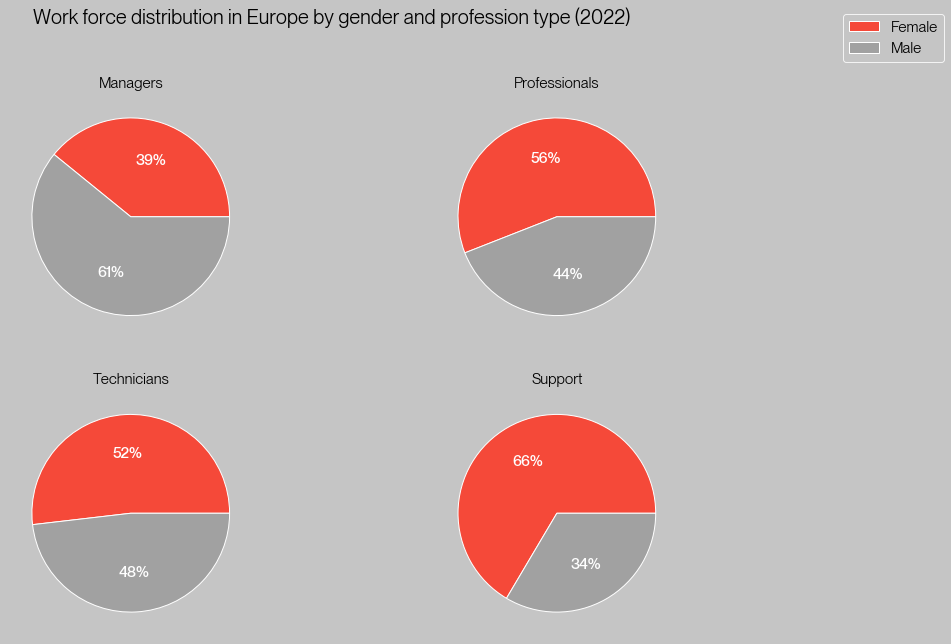

In [12]:
# Define the individual settings of the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), facecolor=c("grey1"))
labels = ['Female', 'Male']
ax.set_facecolor(c("grey1"))
pie_plot_inside_grid4(europe_worker_force_total_managers['2022_females'][0], europe_worker_force_total_managers['2022_males'][0], 0, 0);
pie_plot_inside_grid4(europe_worker_force_total_professionals['2022_females'][0], europe_worker_force_total_professionals['2022_males'][0], 0, 1);
pie_plot_inside_grid4(europe_worker_force_total_technicians['2022_females'][0], europe_worker_force_total_technicians['2022_males'][0], 1, 0);
pie_plot_inside_grid4(europe_worker_force_total_support['2022_females'][0], europe_worker_force_total_support['2022_males'][0], 1, 1);
axs[0, 0].set_title("Managers", size=15)
axs[0, 1].set_title("Professionals", size=15)
axs[1, 0].set_title("Technicians", size=15)
axs[1, 1].set_title("Support", size=15)
plt.figlegend(labels=labels,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');
plt.suptitle('Work force distribution in Europe by gender and profession type (2022)', fontsize=20, y=1);

In [22]:
comparison_dictionary_años = {'años' : ['2019', '2019', '2020', '2020', '2021', '2021', '2022', '2022'],
                              'numero_managers': [europe_worker_force_total_managers['2019_females'][0], europe_worker_force_total_managers['2019_males'][0], europe_worker_force_total_managers['2020_females'][0], europe_worker_force_total_managers['2020_males'][0], europe_worker_force_total_managers['2021_females'][0], europe_worker_force_total_managers['2021_males'][0], europe_worker_force_total_managers['2022_females'][0], europe_worker_force_total_managers['2022_males'][0]],
                              'numero_professionals' : [europe_worker_force_total_professionals['2019_females'][0], europe_worker_force_total_professionals['2019_males'][0], europe_worker_force_total_professionals['2020_females'][0], europe_worker_force_total_professionals['2020_males'][0], europe_worker_force_total_professionals['2021_females'][0], europe_worker_force_total_professionals['2021_males'][0], europe_worker_force_total_professionals['2022_females'][0], europe_worker_force_total_professionals['2022_males'][0]],
                              'numero_technicians' : [europe_worker_force_total_technicians['2019_females'][0], europe_worker_force_total_technicians['2019_males'][0], europe_worker_force_total_technicians['2020_females'][0], europe_worker_force_total_technicians['2020_males'][0], europe_worker_force_total_technicians['2021_females'][0], europe_worker_force_total_technicians['2021_males'][0], europe_worker_force_total_technicians['2022_females'][0], europe_worker_force_total_technicians['2022_males'][0]],
                              'numero_support' : [europe_worker_force_total_support.iloc[0]['2022_females'], europe_worker_force_total_support.iloc[0]['2022_males'], europe_worker_force_total_support.iloc[0]['2021_females'], europe_worker_force_total_support.iloc[0]['2021_males'], europe_worker_force_total_support.iloc[0]['2020_females'], europe_worker_force_total_support.iloc[0]['2020_males'], europe_worker_force_total_support.iloc[0]['2019_females'], europe_worker_force_total_support.iloc[0]['2019_males']],
                              'gender' : ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']}
comparison_dataframe_años = pd.DataFrame.from_dict(comparison_dictionary_años)

In [20]:
def line_plot_comparison_years(dataframe, valor_x, valor_y, valor_hue, ax_number, title):
    colors = [c('red'), c('grey2')]
    sns.set(rc={'axes.facecolor':c('grey1')})
    sns.set_palette(sns.color_palette(colors))
    line_plot_comparison = sns.lineplot(data=dataframe, x=valor_x, y=valor_y, hue=valor_hue, ax=ax_number, linewidth=3).set(title=title)
    return line_plot_comparison

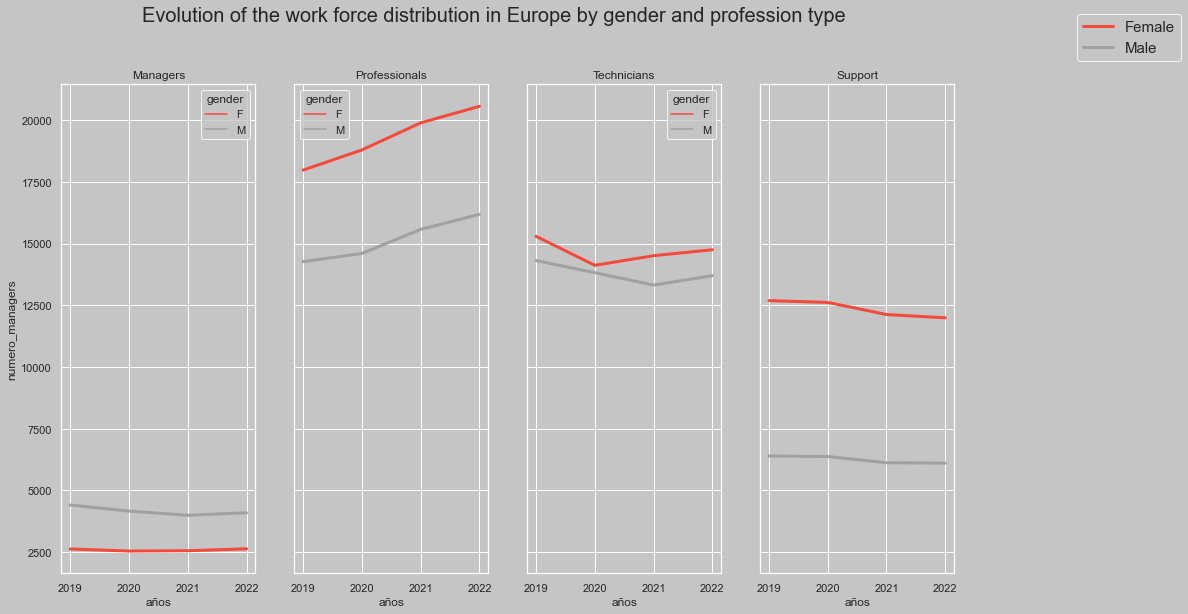

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(16, 9), facecolor=c("grey1"))
ax.set_facecolor(c("grey1"))
colors = [c('red'), c('grey2')]
sns.set_palette(sns.color_palette(colors))

line_plot_comparison_years(comparison_dataframe_años, 'años', "numero_managers", 'gender', ax1, 'Managers');
line_plot_comparison_years(comparison_dataframe_años, 'años', "numero_professionals", 'gender', ax2, 'Professionals');
line_plot_comparison_years(comparison_dataframe_años, 'años', "numero_technicians", 'gender', ax3, 'Technicians');
line_plot_comparison_years(comparison_dataframe_años, 'años', "numero_support", 'gender', ax4, 'Support');
plt.legend([],[], frameon=False)
plt.figlegend(labels=labels,loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white');
plt.suptitle('Evolution of the work force distribution in Europe by gender and profession type', fontsize=20, y=1);